In [38]:
import pandas as pd
# Downloading the data
# from sklearn.datasets import fetch_california_housing
# california_housing = fetch_california_housing()
# # converting the data into pandas dataframe
housing = pd.read_csv('housing.csv')
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [39]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [40]:
## Taking a quick look at the data structure ##
# housing.head() default prints first 5 rows of data
housing.head(n=6) 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY


In [41]:
# info() method is used to get the quick overview of dataset.
# it provides total number of rows, non null values, each attribute type
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [42]:
housing["total_bedrooms"].value_counts()

total_bedrooms
280.0     55
331.0     51
345.0     50
343.0     49
393.0     49
          ..
2961.0     1
1915.0     1
1215.0     1
3298.0     1
1052.0     1
Name: count, Length: 1923, dtype: int64

In [44]:
housing["median_income"].value_counts()

median_income
3.1250     49
15.0001    49
2.8750     46
2.6250     44
4.1250     44
           ..
4.0774      1
4.1767      1
6.1814      1
6.4319      1
2.0943      1
Name: count, Length: 12928, dtype: int64

In [45]:
# describe method shows the summary of numerical attributes
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


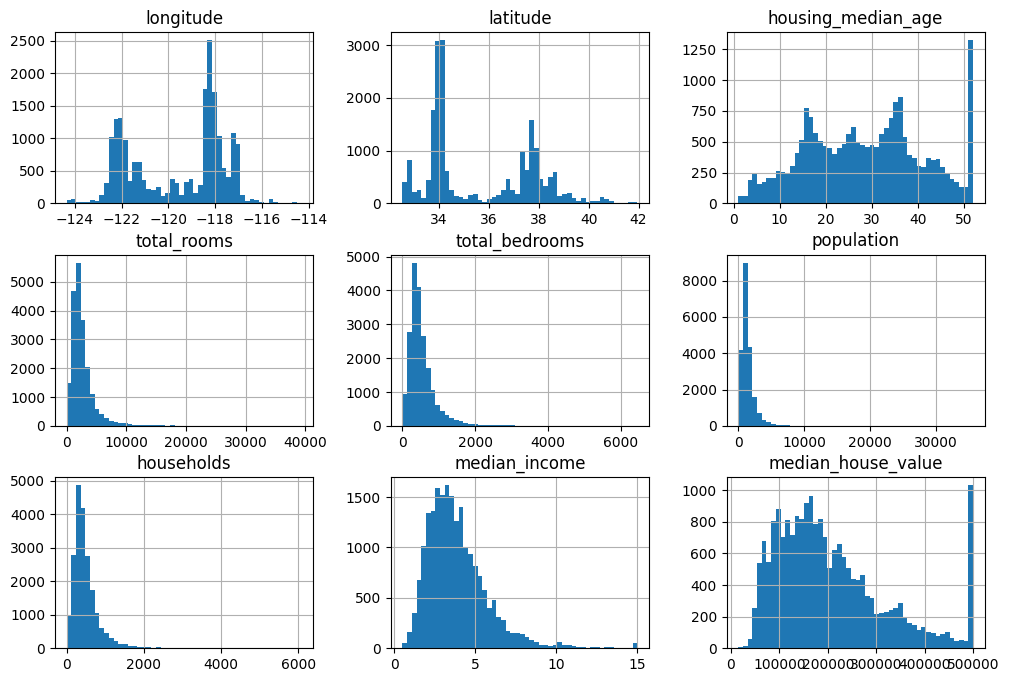

In [46]:
import matplotlib.pyplot as plt
housing.hist(bins=50,figsize=(12,8))
plt.show()

In [47]:
# Creating a test Set
import numpy as np
def shuffle_and_split_data(data, test_ratio):
    shuffles_indices = np.random.permutation(len(data))  #to generate a random permutation of indices
    test_set_size = int(test_ratio * len(data))
    test_indices = shuffles_indices[:test_set_size]
    train_indices = shuffles_indices[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [48]:
train_set , test_set = shuffle_and_split_data(housing,0.2)
len(train_set)

16512

In [49]:
len(test_set)

4128

In [50]:
# Using train test split
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2,random_state=42)

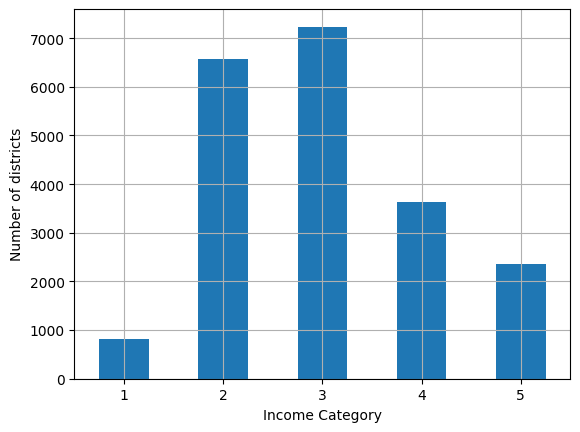

In [52]:
# pd.cut()
housing['income_cat'] = pd.cut(housing['median_income'],bins=[0.,1.5,3.0,4.5,6.,np.inf],labels = [1,2,3,4,5])
housing['income_cat'].value_counts().sort_index().plot.bar(rot=0,grid=True)
plt.xlabel("Income Category")
plt.ylabel("Number of districts")
plt.show()

In [53]:
# Stratified Sampling
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits = 10, test_size = 0.2, random_state=42)
strat_splits = []
for train_index, test_index in splitter.split(housing, housing["income_cat"]):
    strat_train_set_n = housing.iloc[train_index]
    strat_test_set_n = housing.iloc[test_index]
    strat_splits.append([strat_train_set_n,strat_test_set_n])

In [54]:
# for now, we may just use the first split as:
strat_train_set, strat_test_set = strat_splits[0]

In [55]:
# there is also a shorter way to get a single split using train_test_split() function with the stratify argument:
strat_train_set, strat_test_set = train_test_split(housing, test_size=0.2,stratify=housing['income_cat'],random_state=42)

In [56]:
# lets see if this works, lets look at the income category proportions in the test set.
strat_test_set["income_cat"].value_counts()/len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [57]:
housing["income_cat"].value_counts()/(int(housing.shape[0]))

income_cat
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: count, dtype: float64

In [58]:
# from above two codes, we can see that the data is homogenously divided.
# as we wont be using the incomme_cat column further , we need to drop it, reverting the data back to its original state:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat",axis=1,inplace=True)

In [59]:
# Now we will start visualising the data, since we are going to experiment with various transformations of the full training set
# we should make a copy of the original so you can revert to it afterwards:
housing = strat_test_set.copy()

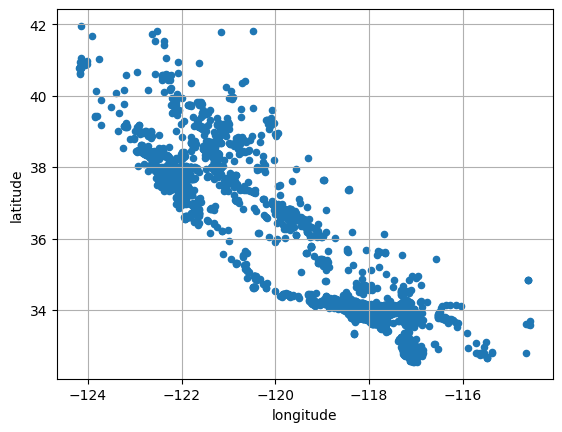

In [61]:
# Visualising graphical data
# lets first vizualise the data using latitude and longitude
housing.plot(kind="scatter",x="longitude",y="latitude",grid = True)
plt.show()
# housing.columns

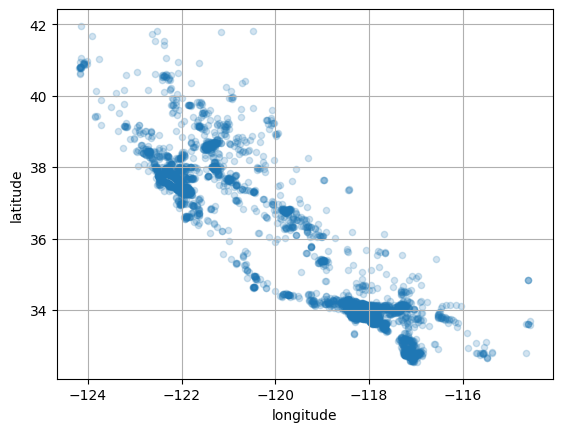

In [62]:
# setting alpha = 0.2 will make it much easier to vizualise the places where there is high density of data points.
# alpha is a parameter that controls the transparency of the markers in your scatter plot. It accepts a value between 0 and 1.
#  When alpha is set to 0, the markers are completely transparent (invisible), and when it's set to 1, the markers are fully opaque. 
# An alpha value of 0.2 means that the markers will be lightly transparent.
# Using transparency can be useful when you have a lot of overlapping points. By setting a lower alpha value,
#  it becomes easier to see the density of the data points and the overall distribution, as you can observe areas where points cluster together.
housing.plot(kind="scatter",x="longitude",y="latitude",grid = True,alpha=0.2)
plt.show()

In [63]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [67]:
# Coorelations in data
# corr_matrix = housing.corr()
# Step 2: Drop non-numerical columns
housing = housing.select_dtypes(include=[float, int])

# Step 3: Apply the correlation matrix
corr_matrix = housing.corr()

In [71]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.691867
total_rooms           0.131296
housing_median_age    0.071210
households            0.070947
total_bedrooms        0.057247
population           -0.016164
longitude            -0.039848
latitude             -0.150336
Name: median_house_value, dtype: float64

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

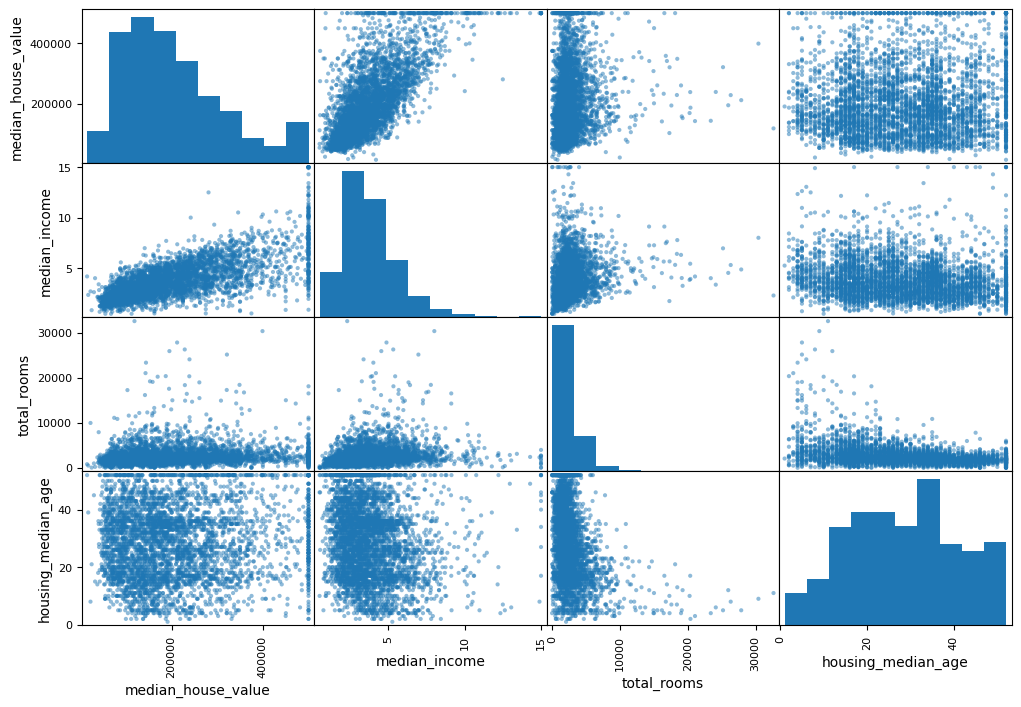

In [72]:
# scatter_matrix() function can also be useed to plot every numerical attribute against every numerical attribut
#  if we have 7 numerical attributes, it will have 7*7=49 plots
from pandas.plotting import scatter_matrix
attributes = ['median_house_value', 'median_income', 'total_rooms','housing_median_age']
scatter_matrix(housing[attributes],figsize=(12,8))

<Axes: xlabel='median_income', ylabel='median_house_value'>

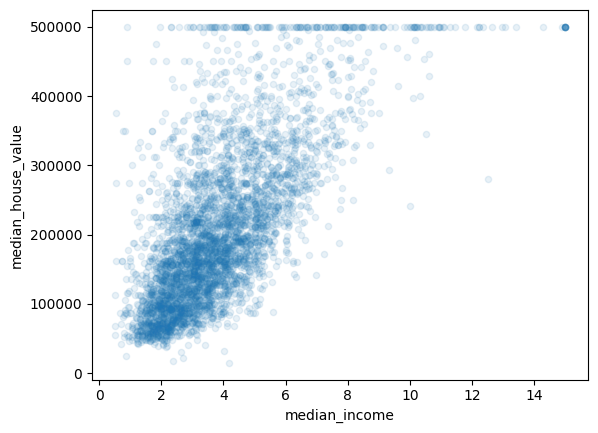

In [73]:
# the scatter matrix plots every numerical attribute against every other numerical attribut, plus a histogram of each numerical attribute
# the main diagonal (top left to top bottom) would be full of straight lines
# if pandas plotted each variable against itself, which would not be very useful.
# So instead pandas displays a histogram of each attribute (other options are available, see pandas documentation for details)
# the most promising attribute to predict the median housing value is the median income, so let's zoom in on their correlation scatterplot
housing.plot(kind = "scatter", x="median_income", y="median_house_value",alpha=0.1)

In [ ]:
# firstly, we can clearly see the upward trend, meaning strong positive correlation
# Secondly, the price cap can be clearly seen as a horizontal lne at 50,000

In [75]:
# Experiment with attribute combinations
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

In [76]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.691867
rooms_per_household         0.192731
total_rooms                 0.131296
housing_median_age          0.071210
households                  0.070947
total_bedrooms              0.057247
population                 -0.016164
longitude                  -0.039848
population_per_household   -0.134999
latitude                   -0.150336
bedrooms_per_room          -0.240481
Name: median_house_value, dtype: float64

In [77]:
# Prepare the data for ML Algorithms
# let's revert to a clean training set(by copying strat_train_set once again).
housing = strat_train_set.drop("median_house_value",axis = 1)
housing_labels = strat_train_set["median_house_value"].copy()
# the drop is used so that the copy created of the data does not effect the strat_Train_Set
# since we dont want to seperate the predictors and the target vale 
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,<1H OCEAN
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,INLAND
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,<1H OCEAN
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,<1H OCEAN


In [78]:
housing_labels

12655     72100.0
15502    279600.0
2908      82700.0
14053    112500.0
20496    238300.0
           ...   
15174    268500.0
12661     90400.0
19263    140400.0
19140    258100.0
19773     62700.0
Name: median_house_value, Length: 16512, dtype: float64

In [ ]:
# Data Cleaning
# Most ML Algorithms cant work with missing values,
# so lets create a few functions to take care of them.
# We saw earlier total_bedrooms attribute has some missing values 
# We have three options:
# 1. Get rid of the corresponding districts.
# 2. Get rid of the entire attribute
# 3. Set the values to some values like zerp, median, mean etc.
# these can be easily accomplished using DataFrames dropna(),drop() and fillna() methods:
housing.dropna(subset=['total_bedrooms']) # Option 1
housing.dropna(subset=["total_bedrooms"])    
housing.drop("total_bedrooms", axis=1)       
# option 1
 # option 2
median = housing["total_bedrooms"].median()  # option 3
housing["total_bedrooms"].fillna(median, inplace=True)

In [79]:
# Scikit learn provides a handy class to take care of missing vaues:
# SimpleImputer
# To use it first we need to create SimpleImputer instan e, specifying 
# that you want to replace each attribute's missing values withe the median of that attribute:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
# Since the median can only be computed for numerical attributes, we need to
# remove the text attribute ocean_proximity:
housing_num = housing.drop("ocean_proximity", axis = 1)

In [80]:
# Now we will fit the imputer instance to the training data using the fit() method:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [81]:
# the imputer has simply computed the median of each attribute 
# and stored in its statistics_ instance variable.
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [82]:
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [83]:
X = imputer.transform(housing_num)
X

array([[-1.2146e+02,  3.8520e+01,  2.9000e+01, ...,  2.2370e+03,
         7.0600e+02,  2.1736e+00],
       [-1.1723e+02,  3.3090e+01,  7.0000e+00, ...,  2.0150e+03,
         7.6800e+02,  6.3373e+00],
       [-1.1904e+02,  3.5370e+01,  4.4000e+01, ...,  6.6700e+02,
         3.0000e+02,  2.8750e+00],
       ...,
       [-1.2272e+02,  3.8440e+01,  4.8000e+01, ...,  4.5800e+02,
         1.7200e+02,  3.1797e+00],
       [-1.2270e+02,  3.8310e+01,  1.4000e+01, ...,  1.2080e+03,
         5.0100e+02,  4.1964e+00],
       [-1.2214e+02,  3.9970e+01,  2.7000e+01, ...,  6.2500e+02,
         1.9700e+02,  3.1319e+00]])

In [84]:
#  The result is a plain NumPy array containing the transformed features. If you want to
#  put it back into a pandas DataFrame, it’s simple:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,index = housing_num.index)
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964
...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964


In [85]:
# Handling text and categorical attributes
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [ ]:
#  let’s convert these categories from
#  text to numbers. For this, we can use Scikit-Learn’s OrdinalEncoder class:


                